In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df_raw = pd.read_csv('full_dataset.csv', sep = '\t')
df_erin = pd.read_excel('Erin.xlsx')
df_erin = df_erin[['link', 'score']].rename(columns = {'score': 'human'})
df_erin.dropna(subset = 'human', inplace = True)

In [24]:
df = df_erin.merge(df_raw , on = 'link', how = 'inner')
df

,link,human,source,title,content,len,model,temperature,prompt,result,score
0,https://abcnews.go.com/Politics/landmark-supre...,-1.0,abcnews,Landmark Supreme Court case weighs gender-affi...,The justices are considering Tennessee's ban o...,7441,claude,0,\n You are an AI trained to evaluate politi...,Here's my analysis of the political bias in th...,0.5
1,https://abcnews.go.com/Politics/landmark-supre...,-1.0,abcnews,Landmark Supreme Court case weighs gender-affi...,The justices are considering Tennessee's ban o...,7441,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article presents bot...,0.0
2,https://abcnews.go.com/Politics/landmark-supre...,-1.0,abcnews,Landmark Supreme Court case weighs gender-affi...,The justices are considering Tennessee's ban o...,7441,gemini,0,\n You are an AI trained to evaluate politi...,1. **Explanation:**\n\n* **Presentation of Mul...,0.0
3,https://abcnews.go.com/Politics/landmark-supre...,-1.0,abcnews,Landmark Supreme Court case weighs gender-affi...,The justices are considering Tennessee's ban o...,7441,claude,0,\n You are an AI trained to evaluate politi...,Here's my analysis of the political bias in th...,0.5
4,https://abcnews.go.com/Politics/landmark-supre...,-1.0,abcnews,Landmark Supreme Court case weighs gender-affi...,The justices are considering Tennessee's ban o...,7441,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article presents bot...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
535,https://www.cnn.com/2024/11/27/politics/trump-...,0.0,cnn,Trump’s trade threats put the world on a preci...,CNN—Global chaos delivered via social media is...,8924,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article presents a c...,-1.0
536,https://www.cnn.com/2024/11/27/politics/trump-...,0.0,cnn,Trump’s trade threats put the world on a preci...,CNN—Global chaos delivered via social media is...,8924,gemini,0,\n You are an AI trained to evaluate politi...,1. **Explanation:**\n\n* **Focus on Trump's ac...,0.0
537,https://www.cnn.com/2024/11/27/politics/trump-...,0.0,cnn,Trump’s trade threats put the world on a preci...,CNN—Global chaos delivered via social media is...,8924,claude,0,\n You are an AI trained to evaluate politi...,Here's my analysis of the political bias in th...,-0.5
538,https://www.cnn.com/2024/11/27/politics/trump-...,0.0,cnn,Trump’s trade threats put the world on a preci...,CNN—Global chaos delivered via social media is...,8924,gpt,0,\n You are an AI trained to evaluate politi...,1. Explanation:\n - The article presents a c...,-1.0


In [25]:
df_group = df.groupby(['link', 'model'])[['score', 'human']].mean().reset_index()
df_group

,link,model,score,human
0,https://abcnews.go.com/Politics/biden-angola-v...,claude,0.0,0.0
1,https://abcnews.go.com/Politics/biden-angola-v...,gemini,0.0,0.0
2,https://abcnews.go.com/Politics/biden-angola-v...,gpt,-0.2,0.0
3,https://abcnews.go.com/Politics/black-republic...,claude,-0.5,0.0
4,https://abcnews.go.com/Politics/black-republic...,gemini,0.0,0.0
...,...,...,...,...
103,https://www.foxnews.com/politics/trump-floats-...,gemini,0.0,0.0
104,https://www.foxnews.com/politics/trump-floats-...,gpt,1.0,0.0
105,https://www.foxnews.com/politics/trump-transit...,claude,1.4,0.0
106,https://www.foxnews.com/politics/trump-transit...,gemini,1.0,0.0


In [26]:
from scipy import stats

# Group data by 'link' and 'model', compute the mean of 'score' and 'human'
df_group = df.groupby(['link', 'model'])[['score', 'human']].mean().reset_index()

# Get the list of unique models
models = df_group['model'].unique()

# Iterate through each model and compute the statistics
for model in models:
    # Filter data for the current model
    model_scores = df_group[df_group['model'] == model]['score']
    human_scores = df_group[df_group['model'] == model]['human']

    # Paired t-test
    t_stat, p_ttest = stats.ttest_rel(model_scores, human_scores)

    # Pearson correlation
    corr_coeff, p_corr = stats.pearsonr(model_scores, human_scores)

    # Output the results in the specified format
    print(f"--- Comparison: Human vs {model} ---")
    print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_ttest:.4f}")
    print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, p-value = {p_corr:.4f}")

    # Interpretation
    alpha = 0.05
    if p_ttest < alpha:
        print(f"Paired t-test: The difference between human and {model} is statistically significant.")
    else:
        print(f"Paired t-test: The difference between human and {model} is not statistically significant.")

    if p_corr < alpha:
        print(f"Pearson Correlation: The correlation between human and {model} is statistically significant.")
    else:
        print(f"Pearson Correlation: The correlation between human and {model} is not statistically significant.")

    print("===")


--- Comparison: Human vs claude ---
Paired t-test: t-statistic = 2.8939, p-value = 0.0065
Pearson Correlation Coefficient: 0.4807, p-value = 0.0030
Paired t-test: The difference between human and claude is statistically significant.
Pearson Correlation: The correlation between human and claude is statistically significant.
===
--- Comparison: Human vs gemini ---
Paired t-test: t-statistic = 2.2913, p-value = 0.0281
Pearson Correlation Coefficient: 0.4770, p-value = 0.0033
Paired t-test: The difference between human and gemini is statistically significant.
Pearson Correlation: The correlation between human and gemini is statistically significant.
===
--- Comparison: Human vs gpt ---
Paired t-test: t-statistic = 2.0137, p-value = 0.0518
Pearson Correlation Coefficient: 0.3526, p-value = 0.0349
Paired t-test: The difference between human and gpt is not statistically significant.
Pearson Correlation: The correlation between human and gpt is statistically significant.
===


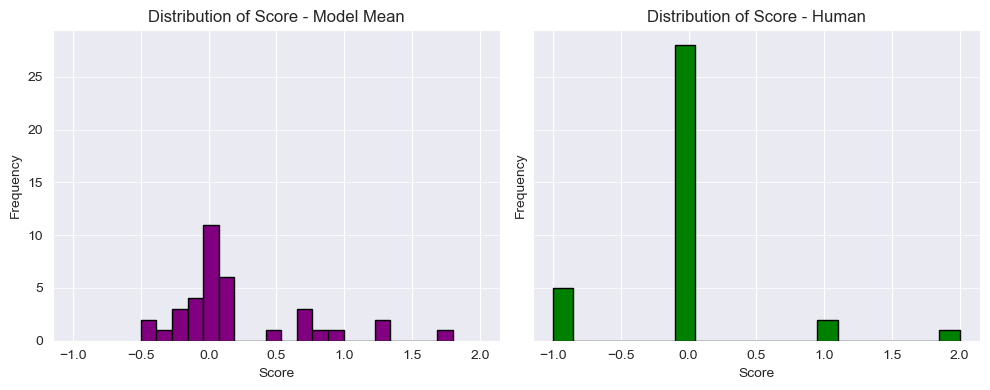

In [27]:
# Calculate the mean score of the three models for each link
grouped_pivot = df_group.pivot(index='link', columns='model', values='score')
grouped_pivot['model_mean'] = grouped_pivot[['claude', 'gemini', 'gpt']].mean(axis=1)

# Add human scores to the table
grouped_pivot['human'] = df_group.groupby('link')['human'].mean()  # Assuming 'human' is consistent for each link

# Create subplots for model mean vs human
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)

# Colors for histograms
colors = ['purple', 'green']

# Plot model mean
model_mean_scores = grouped_pivot['model_mean'].dropna()  # Exclude NaN values
axes[0].hist(model_mean_scores, bins=20, color=colors[0], alpha=1, edgecolor='black')
axes[0].set_title('Distribution of Score - Model Mean')
axes[0].grid(axis='y', alpha=0.75)
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Score')

# Plot human scores
human_scores = grouped_pivot['human'].dropna()  # Exclude NaN values
axes[1].hist(human_scores, bins=20, color=colors[1], alpha=1, edgecolor='black')
axes[1].set_title('Distribution of Score - Human')
axes[1].grid(axis='y', alpha=0.75)
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Score')

# Tight layout for better spacing
plt.tight_layout()
# Save the figure
plt.savefig('fig/model_mean_vs_human.png')
# Show the plot
plt.show()


In [28]:
import pandas as pd
from scipy import stats

# Calculate the mean score of the three models for each link
grouped_pivot = df_group.pivot(index='link', columns='model', values='score')
grouped_pivot['model_mean'] = grouped_pivot[['claude', 'gemini', 'gpt']].mean(axis=1)

# Add human scores to the table
grouped_pivot['human'] = df_group.groupby('link')['human'].mean()  # Assuming 'human' is consistent for each link

# Get the scores for the tests
model_mean_scores = grouped_pivot['model_mean'].dropna()
human_scores = grouped_pivot['human'].dropna()

# Perform paired t-test
t_statistic, p_value_ttest = stats.ttest_rel(model_mean_scores, human_scores)

# Perform Pearson correlation test
correlation_coefficient, p_value_corr = stats.pearsonr(model_mean_scores, human_scores)

# Interpret and print results
alpha = 0.05
print("--- Comparison: Model Mean vs Human ---")
print(f"Paired t-test: t-statistic = {t_statistic:.4f}, p-value = {p_value_ttest:.4f}")
if p_value_ttest < alpha:
    print("Paired t-test: The difference between the model mean and human is statistically significant.")
else:
    print("Paired t-test: The difference between the model mean and human is not statistically significant.")

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}, p-value = {p_value_corr:.4f}")
if p_value_corr < alpha:
    print("Pearson Correlation: The correlation between the model mean and human is statistically significant.")
else:
    print("Pearson Correlation: The correlation between the model mean and human is not statistically significant.")


--- Comparison: Model Mean vs Human ---
Paired t-test: t-statistic = 2.5881, p-value = 0.0140
Paired t-test: The difference between the model mean and human is statistically significant.
Pearson Correlation Coefficient: 0.4718, p-value = 0.0037
Pearson Correlation: The correlation between the model mean and human is statistically significant.
